In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [6]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

In [7]:
lr.score(X_test,y_test)

0.8666666666666667

In [8]:
import matplotlib.pyplot as plt

In [9]:
from matplotlib.colors import ListedColormap


In [19]:
clf=lr
h=0.1 
X_plot,z_plot=X_train,y_train


In [11]:
#standard template
X_min,X_max=X_plot[:,0].min() -1,X_plot[:,0].max() +1
y_min,y_max=X_plot[:,1].min() -1,X_plot[:,1].max() +1




In [12]:
import numpy as np
xx,yy =np.meshgrid(np.arange(X_min,X_max,h),np.arange(y_min,y_max,h))


In [18]:
Z=clf.predict(np.array([xx.ravel(),yy.ravel()]).T)
Z=Z.reshape(xx.shape)

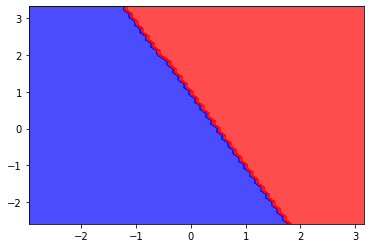

In [20]:
plt.contourf(xx,yy,Z,alpha=0.7,cmap=ListedColormap(("blue","red")))


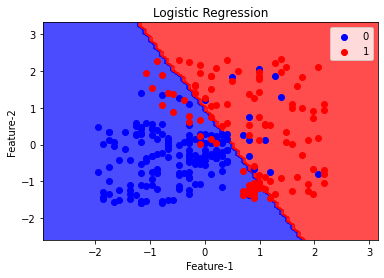

In [22]:
plt.contourf(xx,yy,Z,alpha=0.7,cmap=ListedColormap(("blue","red")))
for i, j in enumerate(np.unique(z_plot)):
    plt.scatter(X_plot[z_plot==i,0],X_plot[z_plot==j,1],
    c=["blue","red"][i],cmap=ListedColormap(("blue","red")),label=j)

plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("Logistic Regression")
plt.xlabel("Feature-1")
plt.ylabel("Feature-2")
plt.legend()
plt.show()
